1. Bibliotecas

In [97]:
import pandas as pd # para ler, visualizar e printar informações de conjunto de dados 
from matplotlib import pyplot as plt # para geração e customização de gráficos 
import seaborn as sns # para visualização de dados baseado em Matplotlib
import numpy as np 


pd.set_option("display.max_columns",None) # mostrar todas as colunas 
pd.set_option("display.max_rows",None) #mostrar todas as linhas

2. Importar o conjunto de dados (dataset) 

In [119]:
df_oleo = pd.read_excel("2020-03-19_LOCALIDADES_AFETADAS.xlsx")

3. Explorar o conjunto de dados

In [120]:
df_oleo.head() # visualizar as 5 primeiras linhas do conjunto de dados

,geocodigo,localidade,loc_id,municipio,estado,sigla_uf,Data_Avist,Data_Revis,Status,Latitude,Longitude,Hora,cou
0,2108058,Praia do Caburé,2108058_7,Paulino Neves,Maranhão,MA,2019-12-01,2019-12-01,Oleada - Vestigios / Esparsos,"2° 38' 4.431"" S","42° 37' 58.21"" W",NaN,1
1,3201605,Praia de Guaxindiba,3201605_29,Conceição da Barra,Espírito Santo,ES,2019-11-18,2020-01-30,Oleo Nao Observado,"18° 33' 18.37"" S","39° 43' 54.42"" W",NaN,1
2,2613404,São José da Coroa Grande,2613404_1,São José da Coroa Grande,Pernambuco,PE,2019-09-25,2019-11-24,Oleo Nao Observado,"8° 52' 13.64"" S","35° 7' 56.56"" W",NaN,1
3,2613404,Abreu do Una,2613404_2,São José da Coroa Grande,Pernambuco,PE,2019-11-28,2020-03-06,Oleo Nao Observado,"8° 51' 11.40"" S","35° 8' 6.848"" W",11:02:53,1
4,2903409,Ilha do Delta do Jequitinhonha,2903409_13,Belmonte,Bahia,BA,2019-11-19,2019-12-12,Oleo Nao Observado,"15° 49' 27.92"" S","38° 51' 57.30"" W",NaN,1


3.1. Selecionar as variáveis de interesse

In [121]:
df_oleo=df_oleo.drop(columns=['loc_id','Data_Revis','Hora','cou'])
df_oleo

,geocodigo,localidade,municipio,estado,sigla_uf,Data_Avist,Status,Latitude,Longitude
0,2108058,Praia do Caburé,Paulino Neves,Maranhão,MA,2019-12-01,Oleada - Vestigios / Esparsos,"2° 38' 4.431"" S","42° 37' 58.21"" W"
1,3201605,Praia de Guaxindiba,Conceição da Barra,Espírito Santo,ES,2019-11-18,Oleo Nao Observado,"18° 33' 18.37"" S","39° 43' 54.42"" W"
2,2613404,São José da Coroa Grande,São José da Coroa Grande,Pernambuco,PE,2019-09-25,Oleo Nao Observado,"8° 52' 13.64"" S","35° 7' 56.56"" W"
3,2613404,Abreu do Una,São José da Coroa Grande,Pernambuco,PE,2019-11-28,Oleo Nao Observado,"8° 51' 11.40"" S","35° 8' 6.848"" W"
4,2903409,Ilha do Delta do Jequitinhonha,Belmonte,Bahia,BA,2019-11-19,Oleo Nao Observado,"15° 49' 27.92"" S","38° 51' 57.30"" W"
5,2903409,Ilha do Delta do Jequitinhonha,Belmonte,Bahia,BA,2019-12-11,Oleo Nao Observado,"15° 50' 2.026"" S","38° 51' 23.08"" W"
6,2700508,Barra de Santo Antônio,Barra de Santo Antônio,Alagoas,AL,2019-09-22,Oleo Nao Observado,"9° 20' 53.80"" S","35° 27' 50.05"" W"
7,2921005,Praia de Itacimirim,Mata de São João,Bahia,BA,2019-11-18,Oleada - Vestigios / Esparsos,"12° 35' 25.77"" S","38° 1' 27.13"" W"
8,2700508,Ilha da Croa,Barra de Santo Antônio,Alagoas,AL,2019-10-13,Oleo Nao Observado,"9° 23' 5.021"" S","35° 29' 33.12"" W"
9,2921005,Costa do Sauípe,Mata de São João,Bahia,BA,2019-10-20,Oleo Nao Observado,"12° 26' 23.20"" S","37° 55' 0.188"" W"


3.2. Verificar se existem valores faltantes (NaN, missing values)

In [122]:
df_oleo.isnull().sum()

geocodigo     0
localidade    4
municipio     0
estado        0
sigla_uf      0
Data_Avist    0
Status        0
Latitude      0
Longitude     0
dtype: int64

A coluna localidade possui 4 NaN's. Identificar as linhas que possuem NaN's

In [123]:
NaN_df = df_oleo[df_oleo['localidade'].isnull()]

In [124]:
NaN_df

,geocodigo,localidade,municipio,estado,sigla_uf,Data_Avist,Status,Latitude,Longitude
1005,2805307,NaN,Pirambu,Sergipe,SE,2020-01-26,Oleada - Vestigios / Esparsos,"10° 43' 9.692"" S","36° 49' 36.92"" W"
1006,2805307,NaN,Pirambu,Sergipe,SE,2020-01-26,Oleada - Vestigios / Esparsos,"10° 42' 8.962"" S","36° 48' 19.95"" W"
1007,2805307,NaN,Pirambu,Sergipe,SE,2020-01-26,Oleada - Vestigios / Esparsos,"10° 41' 48.57"" S","36° 47' 55.19"" W"
1008,2805307,NaN,Pirambu,Sergipe,SE,2020-01-27,Oleada - Vestigios / Esparsos,"10° 38' 20.95"" S","36° 41' 41.64"" W"


In [125]:
geocodigo_df=df_oleo[df_oleo['geocodigo']==2805307]

In [126]:
geocodigo_df

,geocodigo,localidade,municipio,estado,sigla_uf,Data_Avist,Status,Latitude,Longitude
153,2805307,Praia Pirambu,Pirambu,Sergipe,SE,2019-11-18,Oleo Nao Observado,"10° 40' 2.583"" S","36° 45' 6.954"" W"
155,2805307,Praia Pirambu,Pirambu,Sergipe,SE,2019-11-13,Oleo Nao Observado,"10° 40' 20.23"" S","36° 45' 34.78"" W"
180,2805307,Praia Pirambu,Pirambu,Sergipe,SE,2019-11-13,Oleo Nao Observado,"10° 38' 9.919"" S","36° 41' 9.845"" W"
184,2805307,Praia Pirambu,Pirambu,Sergipe,SE,2019-12-09,Oleada - Vestigios / Esparsos,"10° 38' 29.81"" S","36° 42' 10.72"" W"
205,2805307,Praia Pirambu,Pirambu,Sergipe,SE,2020-01-16,Oleo Nao Observado,"10° 40' 37.77"" S","36° 46' 3.775"" W"
207,2805307,Praia Pirambu,Pirambu,Sergipe,SE,2019-11-07,Oleada - Vestigios / Esparsos,"10° 40' 55.80"" S","36° 46' 31.49"" W"
208,2805307,Praia Pirambu,Pirambu,Sergipe,SE,2019-11-09,Oleada - Vestigios / Esparsos,"10° 41' 14.27"" S","36° 47' 2.093"" W"
211,2805307,Praia Pirambu,Pirambu,Sergipe,SE,2019-12-09,Oleada - Vestigios / Esparsos,"10° 41' 32.37"" S","36° 47' 28.42"" W"
217,2805307,Praia da Ponta dos Mangues,Pirambu,Sergipe,SE,2019-11-13,Oleada - Vestigios / Esparsos,"10° 43' 54.29"" S","36° 50' 24.42"" W"
880,2805307,Praia do Pirambu,Pirambu,Sergipe,SE,2019-09-24,Oleo Nao Observado,"10° 44' 18.45"" S","36° 50' 51.51"" W"


Verifiquei as localidades com NaN usando as coordenadas geográficas. Ficam na Praia Pirambu   

In [131]:
df_oleo=df_oleo.fillna("Praia Pirambu")

In [132]:
df_oleo.isnull().sum()

geocodigo     0
localidade    0
municipio     0
estado        0
sigla_uf      0
Data_Avist    0
Status        0
Latitude      0
Longitude     0
dtype: int64

In [133]:
print(df_oleo.sort_values(by=['localidade']))

      geocodigo                                         localidade  \
491     2706802                           APA de Piaçabuçu - Dunas   
250     2802106                                              Abais   
256     2802106                                              Abais   
3       2613404                                       Abreu do Una   
688     2906907                                           Abrolhos   
637     2913606                                             Acuípe   
783     2927408                                          Amaralina   
978     3200607                                            Aracruz   
989     3200607                                            Aracruz   
991     3200607                                            Aracruz   
741     2920700                                    Arandi-Algodões   
739     2920700                                    Arandi-Algodões   
533     2920700                                    Arandi-Algodões   
744     2920700     

In [136]:
df_oleo['localidade']=df_oleo['localidade'].replace('Aritagua','Aritaguá')

In [137]:
print(df_oleo.sort_values(by=['localidade']))

      geocodigo                                         localidade  \
491     2706802                           APA de Piaçabuçu - Dunas   
250     2802106                                              Abais   
256     2802106                                              Abais   
3       2613404                                       Abreu do Una   
688     2906907                                           Abrolhos   
637     2913606                                             Acuípe   
783     2927408                                          Amaralina   
978     3200607                                            Aracruz   
989     3200607                                            Aracruz   
991     3200607                                            Aracruz   
741     2920700                                    Arandi-Algodões   
739     2920700                                    Arandi-Algodões   
533     2920700                                    Arandi-Algodões   
744     2920700     

In [138]:
df_oleo['localidade']=df_oleo['localidade'].replace('Barr Grande (sul)','Barra Grande (sul)')

In [139]:
print(df_oleo.sort_values(by=['localidade']))

      geocodigo                                         localidade  \
491     2706802                           APA de Piaçabuçu - Dunas   
250     2802106                                              Abais   
256     2802106                                              Abais   
3       2613404                                       Abreu do Una   
688     2906907                                           Abrolhos   
637     2913606                                             Acuípe   
783     2927408                                          Amaralina   
978     3200607                                            Aracruz   
989     3200607                                            Aracruz   
991     3200607                                            Aracruz   
741     2920700                                    Arandi-Algodões   
739     2920700                                    Arandi-Algodões   
533     2920700                                    Arandi-Algodões   
744     2920700     

In [140]:
df_oleo['localidade']=df_oleo['localidade'].replace('Costa do atlantico','Costa do Atlântico')

In [141]:
df_oleo['localidade']=df_oleo['localidade'].replace('Dunas de Marape','Dunas de Marapé')

In [142]:
df_oleo['localidade']=df_oleo['localidade'].replace('Foz do rio Manguaba','Foz do Rio Manguaba')

In [143]:
df_oleo['localidade']=df_oleo['localidade'].replace('Ilha do Caju','Ilha do Cajú')

In [144]:
df_oleo['localidade']=df_oleo['localidade'].replace('Ilhas dos Poldros','Ilha dos Poldros')

In [145]:
df_oleo['localidade']=df_oleo['localidade'].replace('Jandaira','Jandaíra')

In [146]:
df_oleo['localidade']=df_oleo['localidade'].replace('Paríso dos Pataxos','Paraíso dos Pataxós')

In [147]:
df_oleo['localidade']=df_oleo['localidade'].replace('Piabuçu','Piaçabuçu')

In [148]:
df_oleo['localidade']=df_oleo['localidade'].replace('PORTO SAUIPE','Porto de Sauípe')

In [149]:
df_oleo['localidade']=df_oleo['localidade'].replace('Porto de Sauipe','Porto de Sauípe')

In [150]:
df_oleo['localidade']=df_oleo['localidade'].replace('Poça','Poças')

In [151]:
df_oleo['localidade']=df_oleo['localidade'].replace('Praia da Boa viagem','Praia da Boa Viagem')

In [152]:
df_oleo['localidade']=df_oleo['localidade'].replace('Praia de Massarandupio','Praia de Massarandupió')

In [153]:
df_oleo['localidade']=df_oleo['localidade'].replace('Uruçuca_Itacare','Uruçuca Itacaré')

In [154]:
df_oleo['localidade']=df_oleo['localidade'].replace('Praia do Pirambu','Praia Pirambu')

In [155]:
print(df_oleo.sort_values(by=['localidade']))

      geocodigo                                         localidade  \
491     2706802                           APA de Piaçabuçu - Dunas   
250     2802106                                              Abais   
256     2802106                                              Abais   
3       2613404                                       Abreu do Una   
688     2906907                                           Abrolhos   
637     2913606                                             Acuípe   
783     2927408                                          Amaralina   
978     3200607                                            Aracruz   
989     3200607                                            Aracruz   
991     3200607                                            Aracruz   
741     2920700                                    Arandi-Algodões   
739     2920700                                    Arandi-Algodões   
533     2920700                                    Arandi-Algodões   
744     2920700     

In [156]:
df_oleo['localidade']=df_oleo['localidade'].replace('Barra de Serinhoém','Barra de Serinhaém')

In [157]:
df_oleo['localidade']=df_oleo['localidade'].replace('Barra de Santo Antônio','Barra do Rio Santo Antônio')

In [158]:
df_oleo['localidade']=df_oleo['localidade'].replace('Barra do Santo Antônio','Barra do Rio Santo Antônio')

In [159]:
df_oleo['localidade']=df_oleo['localidade'].replace('Praia de Larges','Praia de Lages')

In [160]:
df_oleo['localidade']=df_oleo['localidade'].replace('Pontal do Coruripe','Praia de Pontal de Coruripe')

In [161]:
df_oleo['localidade']=df_oleo['localidade'].replace('Praia Pontal de Coruripe','Praia de Pontal de Coruripe')

In [162]:
df_oleo['localidade']=df_oleo['localidade'].replace('Miai de Baixo','Praia de Miai de Baixo')

In [163]:
df_oleo['localidade']=df_oleo['localidade'].replace('Praia de Miai de Baixo','Praia do Miai de Baixo')

In [166]:
df_oleo['localidade']=df_oleo['localidade'].replace('Praia do Saco (1)','Praia do Saco')

In [168]:
df_oleo['localidade']=df_oleo['localidade'].replace('Praia do Saco (2)','Praia do Saco')

In [169]:
df_oleo['localidade']=df_oleo['localidade'].replace('Praia do Saco (3)','Praia do Saco')

In [171]:
df_oleo['localidade']=df_oleo['localidade'].replace('Praia de Pontal do Peba (sul)','Praia de Pontal do Peba')

In [172]:
print(df_oleo.sort_values(by=['localidade']))

      geocodigo                                         localidade  \
491     2706802                           APA de Piaçabuçu - Dunas   
256     2802106                                              Abais   
250     2802106                                              Abais   
3       2613404                                       Abreu do Una   
688     2906907                                           Abrolhos   
637     2913606                                             Acuípe   
783     2927408                                          Amaralina   
989     3200607                                            Aracruz   
991     3200607                                            Aracruz   
978     3200607                                            Aracruz   
533     2920700                                    Arandi-Algodões   
739     2920700                                    Arandi-Algodões   
741     2920700                                    Arandi-Algodões   
744     2920700     

In [173]:
df_oleo.describe(include=object)

,localidade,municipio,estado,sigla_uf,Data_Avist,Status,Latitude,Longitude
count,1009,1009,1009,1009,1009,1009,1009,1009
unique,569,129,11,11,124,2,1009,1009
top,Praia da Barra Nova,Ilhéus,Bahia,BA,2019-11-13,Oleo Nao Observado,"2° 24' 8.178"" S","41° 57' 12.63"" W"
freq,15,49,376,376,36,874,1,1


In [174]:
# Transformando a coluna 'Data_Avist' em datetime.
df_oleo['Data_Avist'] = df_oleo['Data_Avist'].astype('datetime64')

In [175]:
df_oleo.dtypes

geocodigo              int64
localidade            object
municipio             object
estado                object
sigla_uf              object
Data_Avist    datetime64[ns]
Status                object
Latitude              object
Longitude             object
dtype: object

In [177]:
novo_df_oleo = df_oleo.drop_duplicates() # remover as linhas duplicadas
duplicadas_df_oleo = novo_df_oleo[novo_df_oleo.duplicated()] # calcular o total de linhas duplicadas
print(f"Total de linhas duplicadas: {len(duplicadas_df_oleo)}")

Total de linhas duplicadas: 0


In [183]:
df_oleo.groupby(["Status"]).count()

,geocodigo,localidade,municipio,estado,sigla_uf,Data_Avist,Latitude,Longitude
Status,,,,,,,,
Oleada - Vestigios / Esparsos,135,135,135,135,135,135,135,135
Oleo Nao Observado,874,874,874,874,874,874,874,874


In [210]:
df_oleo.head()

,geocodigo,localidade,municipio,estado,sigla_uf,Data_Avist,Status,Latitude,Longitude
0,2108058,Praia do Caburé,Paulino Neves,Maranhão,MA,2019-12-01,Oleada - Vestigios / Esparsos,"2° 38' 4.431"" S","42° 37' 58.21"" W"
1,3201605,Praia de Guaxindiba,Conceição da Barra,Espírito Santo,ES,2019-11-18,Oleo Nao Observado,"18° 33' 18.37"" S","39° 43' 54.42"" W"
2,2613404,São José da Coroa Grande,São José da Coroa Grande,Pernambuco,PE,2019-09-25,Oleo Nao Observado,"8° 52' 13.64"" S","35° 7' 56.56"" W"
3,2613404,Abreu do Una,São José da Coroa Grande,Pernambuco,PE,2019-11-28,Oleo Nao Observado,"8° 51' 11.40"" S","35° 8' 6.848"" W"
4,2903409,Ilha do Delta do Jequitinhonha,Belmonte,Bahia,BA,2019-11-19,Oleo Nao Observado,"15° 49' 27.92"" S","38° 51' 57.30"" W"


In [224]:
oleo=df_oleo.loc[df_oleo['Status']=='Oleada - Vestigios / Esparsos']

In [225]:
oleo

,geocodigo,localidade,municipio,estado,sigla_uf,Data_Avist,Status,Latitude,Longitude
0,2108058,Praia do Caburé,Paulino Neves,Maranhão,MA,2019-12-01,Oleada - Vestigios / Esparsos,"2° 38' 4.431"" S","42° 37' 58.21"" W"
7,2921005,Praia de Itacimirim,Mata de São João,Bahia,BA,2019-11-18,Oleada - Vestigios / Esparsos,"12° 35' 25.77"" S","38° 1' 27.13"" W"
15,3201605,Praia Pontal do Sul,Conceição da Barra,Espírito Santo,ES,2019-11-14,Oleada - Vestigios / Esparsos,"18° 39' 5.425"" S","39° 44' 18.42"" W"
26,2800605,Praia da Costa,Barra dos Coqueiros,Sergipe,SE,2019-11-03,Oleada - Vestigios / Esparsos,"10° 54' 12.41"" S","36° 59' 39.33"" W"
34,2800605,Praia Pontal da Barra,Barra dos Coqueiros,Sergipe,SE,2019-11-09,Oleada - Vestigios / Esparsos,"10° 45' 24.68"" S","36° 52' 2.528"" W"
36,3201605,Praia Pontal do Sul,Conceição da Barra,Espírito Santo,ES,2019-11-19,Oleada - Vestigios / Esparsos,"18° 38' 29.15"" S","39° 44' 10.18"" W"
37,2703601,Praia do Boqueirão,Japaratinga,Alagoas,AL,2019-11-05,Oleada - Vestigios / Esparsos,"9° 7' 57.04"" S","35° 17' 3.733"" W"
50,2905701,Praia da Espera,Camaçari,Bahia,BA,2020-03-19,Oleada - Vestigios / Esparsos,"12° 37' 11.79"" S","38° 2' 37.99"" W"
53,2110278,Santo Amaro do Maranhão,Santo Amaro do Maranhão,Maranhão,MA,2019-09-25,Oleada - Vestigios / Esparsos,"2° 20' 27.49"" S","43° 20' 58.18"" W"
54,2900801,Praia de Iansã,Alcobaça,Bahia,BA,2019-12-11,Oleada - Vestigios / Esparsos,"17° 36' 53.85"" S","39° 11' 4.521"" W"


In [226]:
oleo=oleo.drop(columns=['Data_Avist','Latitude','Longitude'])
oleo

,geocodigo,localidade,municipio,estado,sigla_uf,Status
0,2108058,Praia do Caburé,Paulino Neves,Maranhão,MA,Oleada - Vestigios / Esparsos
7,2921005,Praia de Itacimirim,Mata de São João,Bahia,BA,Oleada - Vestigios / Esparsos
15,3201605,Praia Pontal do Sul,Conceição da Barra,Espírito Santo,ES,Oleada - Vestigios / Esparsos
26,2800605,Praia da Costa,Barra dos Coqueiros,Sergipe,SE,Oleada - Vestigios / Esparsos
34,2800605,Praia Pontal da Barra,Barra dos Coqueiros,Sergipe,SE,Oleada - Vestigios / Esparsos
36,3201605,Praia Pontal do Sul,Conceição da Barra,Espírito Santo,ES,Oleada - Vestigios / Esparsos
37,2703601,Praia do Boqueirão,Japaratinga,Alagoas,AL,Oleada - Vestigios / Esparsos
50,2905701,Praia da Espera,Camaçari,Bahia,BA,Oleada - Vestigios / Esparsos
53,2110278,Santo Amaro do Maranhão,Santo Amaro do Maranhão,Maranhão,MA,Oleada - Vestigios / Esparsos
54,2900801,Praia de Iansã,Alcobaça,Bahia,BA,Oleada - Vestigios / Esparsos


In [227]:
oleo_municipio=oleo.drop(columns=['localidade'])
oleo_municipio

,geocodigo,municipio,estado,sigla_uf,Status
0,2108058,Paulino Neves,Maranhão,MA,Oleada - Vestigios / Esparsos
7,2921005,Mata de São João,Bahia,BA,Oleada - Vestigios / Esparsos
15,3201605,Conceição da Barra,Espírito Santo,ES,Oleada - Vestigios / Esparsos
26,2800605,Barra dos Coqueiros,Sergipe,SE,Oleada - Vestigios / Esparsos
34,2800605,Barra dos Coqueiros,Sergipe,SE,Oleada - Vestigios / Esparsos
36,3201605,Conceição da Barra,Espírito Santo,ES,Oleada - Vestigios / Esparsos
37,2703601,Japaratinga,Alagoas,AL,Oleada - Vestigios / Esparsos
50,2905701,Camaçari,Bahia,BA,Oleada - Vestigios / Esparsos
53,2110278,Santo Amaro do Maranhão,Maranhão,MA,Oleada - Vestigios / Esparsos
54,2900801,Alcobaça,Bahia,BA,Oleada - Vestigios / Esparsos


In [228]:
oleo_municipio.shape

(135, 5)

In [229]:
oleo_municipio=oleo_municipio.drop_duplicates() # remover as linhas duplicadas


In [230]:
oleo_municipio.shape

(41, 5)

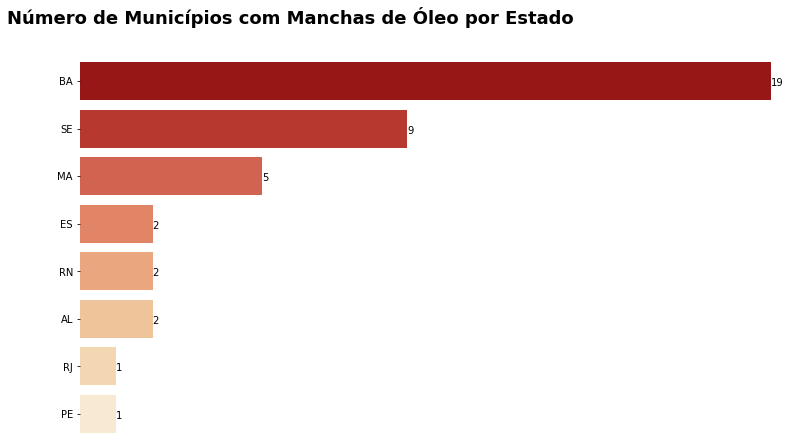

In [307]:
# plotando o gráfico
fig, ax = plt.subplots(figsize= (13,7))
n_plots = 8
palette = sns.color_palette("OrRd", n_colors=n_plots)
palette.reverse()
with palette:
  ax = sns.countplot(y='sigla_uf', data=oleo_municipio,  order = oleo_municipio['sigla_uf'].value_counts().index)
  # plotar título
  plt.text(-2, -1.2, 'Número de Municípios com Manchas de Óleo por Estado',
          fontsize=18, 
          color='black',
          weight='bold')
  initialx=0

 #remover grid
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['top'].set_visible(False)
  ax.spines['bottom'].set_visible(False)

  #remover titulos
  ax.set_ylabel('')    
  ax.set_xlabel('')

  plt.tick_params(
    axis='both',         
    which='both',     
    bottom=False,      
    top=False,         
    labelbottom=False) 
    
  #adicionar labels
  for p in ax.patches:
    ax.text(p.get_width(),initialx+p.get_height()/8,'{:1.0f}'.format(p.get_width()))
    initialx+=1
  plt.show()


In [234]:
oleo_localidade=oleo.drop(columns=['geocodigo','municipio'])
oleo_localidade

,localidade,estado,sigla_uf,Status
0,Praia do Caburé,Maranhão,MA,Oleada - Vestigios / Esparsos
7,Praia de Itacimirim,Bahia,BA,Oleada - Vestigios / Esparsos
15,Praia Pontal do Sul,Espírito Santo,ES,Oleada - Vestigios / Esparsos
26,Praia da Costa,Sergipe,SE,Oleada - Vestigios / Esparsos
34,Praia Pontal da Barra,Sergipe,SE,Oleada - Vestigios / Esparsos
36,Praia Pontal do Sul,Espírito Santo,ES,Oleada - Vestigios / Esparsos
37,Praia do Boqueirão,Alagoas,AL,Oleada - Vestigios / Esparsos
50,Praia da Espera,Bahia,BA,Oleada - Vestigios / Esparsos
53,Santo Amaro do Maranhão,Maranhão,MA,Oleada - Vestigios / Esparsos
54,Praia de Iansã,Bahia,BA,Oleada - Vestigios / Esparsos


In [235]:
oleo_localidade.shape

(135, 4)

In [236]:
oleo_localidade=oleo_localidade.drop_duplicates() # remover as linhas duplicadas


In [237]:
oleo_localidade.shape

(87, 4)

In [247]:
oleo_localidade['sigla_uf'].value_counts() # qtidade de localidade com oleo em cada estado

BA    44
SE    16
MA    12
AL     6
RN     4
ES     3
RJ     1
PE     1
Name: sigla_uf, dtype: int64

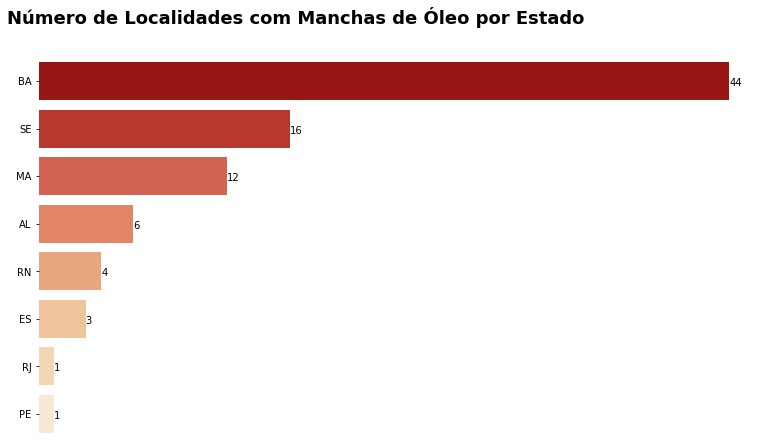

In [308]:
# plotando o gráfico
fig, ax = plt.subplots(figsize= (13,7))
n_plots = 8
palette = sns.color_palette("OrRd", n_colors=n_plots)
palette.reverse()
with palette:
  ax = sns.countplot(y='sigla_uf', data=oleo_localidade,  order = oleo_localidade['sigla_uf'].value_counts().index)
  # plotar título
  plt.text(-2, -1.2, 'Número de Localidades com Manchas de Óleo por Estado',
          fontsize=18, 
          color='black',
          weight='bold')
  initialx=0

 #remover grid
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['top'].set_visible(False)
  ax.spines['bottom'].set_visible(False)

  #remover titulos
  ax.set_ylabel('')    
  ax.set_xlabel('')

  plt.tick_params(
    axis='both',         
    which='both',     
    bottom=False,      
    top=False,         
    labelbottom=False) 
    
  #adicionar labels
  for p in ax.patches:
    ax.text(p.get_width(),initialx+p.get_height()/8,'{:1.0f}'.format(p.get_width()))
    initialx+=1
  plt.show()


In [310]:
df_oleo.head()

,geocodigo,localidade,municipio,estado,sigla_uf,Data_Avist,Status,Latitude,Longitude
0,2108058,Praia do Caburé,Paulino Neves,Maranhão,MA,2019-12-01,Oleada - Vestigios / Esparsos,"2° 38' 4.431"" S","42° 37' 58.21"" W"
1,3201605,Praia de Guaxindiba,Conceição da Barra,Espírito Santo,ES,2019-11-18,Oleo Nao Observado,"18° 33' 18.37"" S","39° 43' 54.42"" W"
2,2613404,São José da Coroa Grande,São José da Coroa Grande,Pernambuco,PE,2019-09-25,Oleo Nao Observado,"8° 52' 13.64"" S","35° 7' 56.56"" W"
3,2613404,Abreu do Una,São José da Coroa Grande,Pernambuco,PE,2019-11-28,Oleo Nao Observado,"8° 51' 11.40"" S","35° 8' 6.848"" W"
4,2903409,Ilha do Delta do Jequitinhonha,Belmonte,Bahia,BA,2019-11-19,Oleo Nao Observado,"15° 49' 27.92"" S","38° 51' 57.30"" W"


In [314]:
# Extraindo o mês da data
df_oleo['Month'] = pd.DatetimeIndex(df_oleo['Data_Avist']).month

In [315]:
# Extraindo o nome do mês
import calendar
df_oleo['Month'] = df_oleo['Month'].apply(lambda x: calendar.month_abbr[x])
df_oleo.head()

,geocodigo,localidade,municipio,estado,sigla_uf,Data_Avist,Status,Latitude,Longitude,Month
0,2108058,Praia do Caburé,Paulino Neves,Maranhão,MA,2019-12-01,Oleada - Vestigios / Esparsos,"2° 38' 4.431"" S","42° 37' 58.21"" W",Dec
1,3201605,Praia de Guaxindiba,Conceição da Barra,Espírito Santo,ES,2019-11-18,Oleo Nao Observado,"18° 33' 18.37"" S","39° 43' 54.42"" W",Nov
2,2613404,São José da Coroa Grande,São José da Coroa Grande,Pernambuco,PE,2019-09-25,Oleo Nao Observado,"8° 52' 13.64"" S","35° 7' 56.56"" W",Sep
3,2613404,Abreu do Una,São José da Coroa Grande,Pernambuco,PE,2019-11-28,Oleo Nao Observado,"8° 51' 11.40"" S","35° 8' 6.848"" W",Nov
4,2903409,Ilha do Delta do Jequitinhonha,Belmonte,Bahia,BA,2019-11-19,Oleo Nao Observado,"15° 49' 27.92"" S","38° 51' 57.30"" W",Nov


In [332]:
oleo_mes=df_oleo.loc[df_oleo['Status']=='Oleada - Vestigios / Esparsos']
oleo_mes.head()

,geocodigo,localidade,municipio,estado,sigla_uf,Data_Avist,Status,Latitude,Longitude,Month
0,2108058,Praia do Caburé,Paulino Neves,Maranhão,MA,2019-12-01,Oleada - Vestigios / Esparsos,"2° 38' 4.431"" S","42° 37' 58.21"" W",Dec
7,2921005,Praia de Itacimirim,Mata de São João,Bahia,BA,2019-11-18,Oleada - Vestigios / Esparsos,"12° 35' 25.77"" S","38° 1' 27.13"" W",Nov
15,3201605,Praia Pontal do Sul,Conceição da Barra,Espírito Santo,ES,2019-11-14,Oleada - Vestigios / Esparsos,"18° 39' 5.425"" S","39° 44' 18.42"" W",Nov
26,2800605,Praia da Costa,Barra dos Coqueiros,Sergipe,SE,2019-11-03,Oleada - Vestigios / Esparsos,"10° 54' 12.41"" S","36° 59' 39.33"" W",Nov
34,2800605,Praia Pontal da Barra,Barra dos Coqueiros,Sergipe,SE,2019-11-09,Oleada - Vestigios / Esparsos,"10° 45' 24.68"" S","36° 52' 2.528"" W",Nov


In [326]:
oleo_mes['Month'].value_counts() 

Nov    77
Dec    36
Oct    11
Jan     6
Sep     4
Mar     1
Name: Month, dtype: int64

In [327]:
oleo_mes.shape

(135, 10)

In [328]:
oleo_mes=oleo_mes.drop_duplicates() # remover as linhas duplicadas


In [329]:
oleo_mes.shape

(135, 10)

In [330]:
oleo_mes=oleo_mes.drop(columns=['geocodigo','municipio','Data_Avist','Latitude','Longitude'])
oleo_mes.shape

(135, 5)

In [331]:
oleo_mes.head()

,localidade,estado,sigla_uf,Status,Month
0,Praia do Caburé,Maranhão,MA,Oleada - Vestigios / Esparsos,Dec
7,Praia de Itacimirim,Bahia,BA,Oleada - Vestigios / Esparsos,Nov
15,Praia Pontal do Sul,Espírito Santo,ES,Oleada - Vestigios / Esparsos,Nov
26,Praia da Costa,Sergipe,SE,Oleada - Vestigios / Esparsos,Nov
34,Praia Pontal da Barra,Sergipe,SE,Oleada - Vestigios / Esparsos,Nov


In [59]:
# Definindo a coluna 'Data_Avist' como índice do DataFrame.
df_oleo.set_index('Data_Avist',inplace=True)

In [60]:
# Salvando os dados.
df_oleo.to_csv('oleo_litoral.csv')